<h2>Image Classification</h2>
<p>In this notebook, I will implement k-NN to classify images of faces. I will use the NumPy library to (1) implement functions that will find nearest neighbors, (2) calculate absolute loss, (3) perform k-NN classification on a data set, and (4) calculate the accuracy of my classifier.</p>

<h2>Import Libraries</h2>

<p>Before you get started, you need to import a few libraries. You can do this by executing the following code. Remember, run code in a cell by selecting the cell, holding the shift key, and pressing enter/return.</p>

In [ ]:
import numpy as np
from scipy.stats import mode
import sys
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import loadmat
import time
from helper import *

print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.7.13


<h2>k-Nearest Neighbors Implementation in Python</h2>

<p>The goal of implementing this $k$-NN classifier is to build a classifier for [TBD]. I have obtained some data, [TBD], for testing my code. The data resides in the file <code>TBD</code>, which holds the dataset for the exercises below.</p>

<p>I will refer to the training vectors as <b>xTr</b> with labels <b>yTr</b>. The testing vectors are <b>xTe</b> with labels <b>yTe</b>.
As a reminder, to predict the label or class of an image in <b>xTe</b>, I will look for the <i>k</i>-nearest neighbors in <b>xTr</b> and predict a label based on their labels in <b>yTr</b>. For evaluation, I will compare these labels against the true labels provided in <b>yTe</b>.</p>

<h3> Visualizing the Data</h3>

<p>Let us take a look at the data. The following script will take the first ten training images from the face dataset and visualize them. Run the code cell to see the visualized data.</p>

In [ ]:
# xTr,yTr,xTe,yTe=loaddata("faces.mat")


<h2>Implement k-NN for Facial Recognition</h2>
<p>The following four steps implement each function necessary to build the classification system.</p>

<h3>Part 1: Implement <b><code>findknn</code></b> </h3>

Implement the function <b><code>findknn</code></b>, which should find the $k$ nearest neighbors ($k \le n$) of a set of vectors within a given training data set. With `xTr` of size $n \times d$ and `xTe` of size $m \times d$, the call of:
```python
[I, D] = findknn(xTr, xTe, k)
```
should result in two matrices `I` and `D`, both of dimensions $k\times m$, where $m$ is the number of input vectors in <code>xTe</code>. The matrix `I[i, j]` is the index of the $i^{th}$ nearest neighbor of the vector `xTe[j, :]`.

So, for example, if we set <code>i = I(1, 3)</code>, then <code>xTr[i, :]</code> is the first nearest neighbor of vector <code>xTe[3, :]</code>. The second matrix `D` returns the corresponding distances. So `D[i, j]` is the distance of `xTe[j, :]` to its $i^{th}$ nearest neighbor.

`l2distance(X, Z)` from the last exercise is readily available to you with the following specification:
```python
"""
Computes the Euclidean distance matrix.
Syntax: D = l2distance(X, Z)
Input:
    X: nxd data matrix with n vectors (rows) of dimensionality d
    Z: mxd data matrix with m vectors (rows) of dimensionality d    
Output:
    Matrix D of size nxm
        D(i, j) is the Euclidean distance of X(i, :) and Z(j, :)
call with only one input: l2distance(X) = l2distance(X, X).
"""
```

One way to use `l2distance()` is as follows:
1. Compute distances `D` between `xTr` and `xTe` using `l2distance`.
2. Get indices of `k`-smallest distances for each testing point to create the `I` matrix.
3. Use `I` to re-order `D` or create `D` by getting the `k`-smallest distances for each testing point.

You may find <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html"><code>np.argsort(D, axis=0)</code></a> and <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.sort.html"><code>np.sort(D, axis=0)</code></a> useful when implementing <code>findknn</code>.

In [ ]:
def findknn(xTr,xTe,k):
    """
    function [indices,dists]=findknn(xTr,xTe,k);
    
    Finds the k nearest neighbors of xTe in xTr.
    
    Input:
    xTr = nxd input matrix with n row-vectors of dimensionality d
    xTe = mxd input matrix with m row-vectors of dimensionality d
    k = number of nearest neighbors to be found
    
    Output:
    indices = kxm matrix, where indices(i,j) is the i^th nearest neighbor of xTe(j,:)
    dists = Euclidean distances to the respective nearest neighbors
    """
    # start by computing D matrix with l2 distance
    D = l2distance(xTr,xTe)
    # print(D)
    # For all of the m training points in xTe, need to find the k-nearest neighbors (in the jth column of D, 
    # the k smallest values)
    # 0 <= j <= m
    # need the distances and the indices in D
    # IDEA: Use argsort on each column in D, and grab the first k values with a slice -> matrix I of indices
    # Use sort to order distances, and grab the first k values with a slice -> matrix D of distances
    
    indices = np.argsort(D,axis=0)[:k,:]
    # print(indices)
    # note to self: when sorting on columns, use axis=0
    
    dists = np.sort(D,axis=0)[:k,:]
    # print(dists)
    
    return [indices, dists]

In [ ]:
A = np.random.randint(20, size=(7, 2))
B = np.random.randint(20, size=(5, 2))
print(A)
print(B)

[[14  4]
 [16 19]
 [17  5]
 [ 5 17]
 [13  5]
 [ 2  4]
 [19  1]]
[[ 9  7]
 [11  1]
 [15  0]
 [ 9  8]
 [14 16]]


In [ ]:
findknn(A,B,5)

[array([[4, 0, 0, 4, 1],
        [0, 4, 6, 0, 3],
        [5, 2, 2, 5, 4],
        [2, 6, 4, 2, 2],
        [3, 5, 5, 3, 0]]),
 array([[ 4.47213595,  4.24264069,  4.12310563,  5.        ,  3.60555128],
        [ 5.83095189,  4.47213595,  4.12310563,  6.40312424,  9.05538514],
        [ 7.61577311,  7.21110255,  5.38516481,  8.06225775, 11.04536102],
        [ 8.24621125,  8.        ,  5.38516481,  8.54400375, 11.40175425],
        [10.77032961,  9.48683298, 13.60147051,  9.8488578 , 12.        ]])]

In [ ]:
# Run this self-test cell to check your code

def knn_0():
    # checking output types
    xTr = np.random.rand(500,10) # defininng 500 training data points 
    xTe = np.random.rand(300,10) # defining 300 testing data points
    Ig,Dg = findknn(xTr,xTe,5) # compute indices and distances to the 5- nearest neighbors 
    # check if Ig is a matrix of integers, Dg a matrix of floats
    test=(type(Ig)==np.ndarray)  & (type(Ig)==np.ndarray) & ((type(Dg[0][0])==np.float64) or (type(Dg[0][0])==np.float32)) & ((type(Dg[0][0])==np.float64) or (type(Dg[0][0])==np.float32))
    return test

def knn_1():
    # checking output dimensions
    xTr = np.random.rand(500,10) # defininng 500 training data points 
    xTe = np.random.rand(300,10) # defining 300 testing data points
    Ig,Dg = findknn(xTr,xTe,5) # compute indices and distances to the 5- nearest neighbors 
    test=(Ig.shape==(5,300)) & (Dg.shape==(5,300)) # test if output dimensions are correct
    return test

def knn_2():
    # checking 1-NN accuracy
    xTr = np.random.rand(500,10) # defininng 500 training data points 
    xTe = np.random.rand(300,10) # defining 300 testing data points
    Ig,Dg = findknn_grader(xTr,xTe,1) # compute indices and distances to the nearest neighbors with *our* code
    Is,Ds = findknn(xTr,xTe,1) # Use *your* code
    test = np.linalg.norm(Ig - Is) + np.linalg.norm(Dg - Ds) # compare results
    return test<1e-5 

def knn_3():
    # checking 3-NN accuracy
    xTr = np.random.rand(500,10) # defininng 500 training data points 
    xTe = np.random.rand(300,10) # defining 300 testing data points
    Ig,Dg = findknn_grader(xTr,xTe,3) # compute indices and distances to the 3-nearest neighbors with *our* code
    Is,Ds = findknn(xTr,xTe,3) # Use *your* code
    test = np.linalg.norm(Ig - Is) + np.linalg.norm(Dg - Ds) # compare results
    return test<1e-5 

runtest(knn_0,'knn_0')
runtest(knn_1,'knn_1')
runtest(knn_2,'knn_2')
runtest(knn_3,'knn_3')

Running Test: knn_0 ... ✔ Passed!
Running Test: knn_1 ... ✔ Passed!
Running Test: knn_2 ... ✔ Passed!
Running Test: knn_3 ... ✔ Passed!


In [ ]:
# Autograder test cell - worth 1 point
# runs knn_0

In [ ]:
# Autograder test cell - worth 1 point
# runs knn_1

In [ ]:
# Autograder test cell - worth 1 point
# runs knn_2

In [ ]:
# Autograder test cell - worth 1 point
# runs knn_3

<h3>Part 2: Implement <b><code>accuracy</code></b> [Graded]</h3>

The function <b><code>accuracy</code></b> should compute the accuracy of a classifier. The call of:
```python
result = accuracy(truth, preds)
```
should output the <b>accuracy</b> in variable <code>result</code>. The input variables <code>truth</code> and <code>preds</code> should contain vectors of true and predicted labels respectively.

For example, the call:
```python
accuracy([1, 2, 1, 2], [1, 2, 1, 1])
```
<p>should return an accuracy of 0.75. Here, the true labels are 1,2,1,2 and the predicted labels are 1,2,1,1. So the first three examples are classified correctly, and the last one is wrong -- 75% accuracy.</p>
<p>You may find the following functions helpful: <code>flatten()</code>, <code>np.mean()</code> and <code>np.abs()</code>.</p>

In [ ]:
def accuracy(truth,preds):
    """
    function output=accuracy(truth,preds)         
    Analyzes the accuracy of a prediction against the ground truth
    
    Input:
    truth = n-dimensional vector of true class labels
    preds = n-dimensional vector of predictions
    
    Output:
    accuracy = scalar (percent of predictions that are correct)
    """
    # input is two n-dimensional vectors
    # IDEA: subtract vectors, count the non-zero results, divide by n
    
    # Make sure the two vectors have the same shape
    if truth.shape != preds.shape:
        preds = np.reshape(preds,truth.shape)
    
    diff = truth-preds
    mistakes = np.count_nonzero(diff)
    # print(diff)
    n = truth.size
    accuracy = np.float64(1-mistakes/n)
    # print("There are",mistakes,"mistakes in preds")
    # print("Accuracy: ",accuracy)
    # print("Answer is type ",type(accuracy))
    return accuracy

In [ ]:
# Test cases
truth = np.array([1, 2, 3, 4])
preds = np.array([1, 2, 3, 0])

print("True labels are:",truth)
print("Predicted labels are:",preds)

accuracy(truth,preds)


True labels are: [1 2 3 4]
Predicted labels are: [1 2 3 0]


0.75

In [ ]:
# Run this self-test cell to check your code

def accuracy_test0():
    # check type of output is correct
    truth = np.array([1, 2, 3, 4])
    preds = np.array([1, 2, 3, 0])
    return type(accuracy(truth,preds))==np.float64

def accuracy_test1():
    # accuracy check on 4 sample data
    truth = np.array([1, 2, 3, 4]) # define truth 
    preds = np.array([1, 2, 3, 0]) # define preds
    return abs(accuracy(truth,preds) - 0.75)<1e-10 # check if accuracy is correct

def accuracy_test2():
    # accuracy check on random samples
    p=np.random.rand(1,1000); # define random string of [0,1] as truth
    truth=np.int16(p>0.5)
    p2=p+np.random.randn(1,1000)*0.1; # define very similar version as preds
    preds=np.int16(p2>0.5)
    return abs(accuracy(truth,preds) - accuracy_grader(truth,preds))<1e-10 # check if accuracy is correct

runtest(accuracy_test0,'accuracy_test0 (types)')
runtest(accuracy_test1,'accuracy_test1 (exactness)')
runtest(accuracy_test2,'accuracy_test2 (exactness)')

Running Test: accuracy_test0 (types) ... ✔ Passed!
Running Test: accuracy_test1 (exactness) ... ✔ Passed!
Running Test: accuracy_test2 (exactness) ... ✔ Passed!


In [ ]:
# Autograder test cell - worth 1 point
# runs accuracy_test0

In [ ]:
# Autograder test cell - worth 1 point
# runs accuracy_test1

In [ ]:
# Autograder test cell - worth 1 point
# runs accuracy_test2

<h3>Part 3: Implement <b><code>knnclassifier</code></b> [Graded]</h3>

Implement the function <b><code>knnclassifier</code></b>, which should perform `k` nearest neighbor classification on a given test data set. The call:
```python
preds = knnclassifier(xTr, yTr, xTe, k)
```
should output the predictions for the data in <code>xTe</code>, i.e. <code>preds[i]</code> will contain the prediction for <code>xTe[i, :]</code>.

You may find it helpful to use <code>flatten()</code> in the implementation of this function. It will also be useful to  refer back to the mode function you implemented Additional NumPy Exercises.

In [ ]:
def mode(a):
    return(max(a,key=a.count))

def modeC(M):
    return([mode(list(column)) for column in M.T])

In [ ]:
def knnclassifier(xTr,yTr,xTe,k):
    """
    function preds=knnclassifier(xTr,yTr,xTe,k);
    
    k-nn classifier 
    
    Input:
    xTr = nxd input matrix with n row-vectors of dimensionality d
    yTr = n-dimensional vector of labels
    xTe = mxd input matrix with m row-vectors of dimensionality d
    k = number of nearest neighbors to be found
    
    Output:
    
    preds = predicted labels, ie preds(i) is the predicted label of xTe(i,:)
    """
    # fix array shapes
    yTr = yTr.flatten() # known labels of training data
    #print("The training labels are: ",yTr)
    
    # indices = kxm matrix, where indices(i,j) is the i^th nearest neighbor of xTe(j,:)
    # dists = Euclidean distances to the respective nearest neighbors
    [indices,dists]=findknn(xTr,xTe,k)
    #print("The indices of the",k,"nearest neigbors are:\n",indices)
    
    # For each of the test points, I need to find most common label among its KNN
    # indices tells me where all the KNN are (each column is a different test point, # of rows is # of KNN)
    # indices(i,j) is the i^th nearest neighbor of xTe(j,:), stored as the row in the training data where that i^th
    # nearest neighbor is located. This is also the row where that i^th neighbor's label is. I need to determine the 
    # labels of all the nearest neighbors and find the most common label.
   
    # votes = np.nparray(kxm) containing the labels of each KNN for the m test points
    m, cols = xTe.shape
    votes = np.empty_like(indices)
    
    # want to use the values in indices to access values in yTr and populate votes.. not sure
    # how to do so efficiently. Can I do it without loops? Each column in indices has k values,
    # each of which tell me what position in yTr to look at.
    
    #for j in range(m): #iterate over each test point
    #    for i in range(k): #iterate over each of the indices of its neighbors
    #        votes[i,j]=yTr[indices[i,j]] #look up the label of the neighbor, and store it in votes
    
    # read about indexing a matrix with a matrix of indices, returning a matrix of values on 
    # https://jasondeden.medium.com/array-indexing-slicing-vs-loops-753484854bc8
    votes = yTr[indices]
    #print("The labels of the nearest neighbors are:\n",votes)
    
    # preds = np.array(1xm) final decision of label, based on mode of each column from votes
    preds = np.array(modeC(votes))
    
    #print(preds.shape)
    #no longer needed, handling reshaping in the accuracy function
    #preds = np.reshape(preds,(m,1))
    #print(preds.shape)
    
    #print("The predicted labels for the training points are:\n",preds)
    
    return preds

# April 22 - my classifier passed all the self-test cells, but the accuracy listed is super weird (-11600%)
# April 23 - edited my accuracy function to check that the shape of the two input arrays match, changing them if not,
# and my classifier now works as expected

In [ ]:
# My tests

X = np.array([[1,0,0,1],[0,1,0,1]]).T
Y = np.array([1,1,2,2])

train = X
labels = Y
test = X
neighbors = 3

preds = knnclassifier(train,labels,test,1)
result = accuracy(preds,preds)

print("You obtained %.2f%% classification acccuracy\n" % (result*100.0))

You obtained 100.00% classification acccuracy



In [ ]:
# Run this self-test cell to check your code

def knn_classifier_test0():
    # test if output is a numpy array, and of the right length
    X = np.array([[1,0,0,1],[0,1,0,1]]).T
    y = np.array([1,1,2,2])
    preds=knnclassifier(X,y,X,1)
    return type(preds)==np.ndarray and preds.shape==(4,)


def knn_classifier_test1():
    X = np.array([[1,0,0,1],[0,1,0,1]]).T
    y = np.array([1,1,2,2])
    np.testing.assert_allclose(knnclassifier(X,y,X,1),y)
    return np.testing.assert_allclose


def knn_classifier_test2():
    X = np.array([[1,0,0,1],[0,1,0,1]]).T
    y = np.array([1,1,2,2])
    y2 = np.array([2,2,1,1])
    return np.array_equal(knnclassifier(X,y,X,3),y2)

def knn_classifier_test3():
    X = np.array([[-4,-3,-2,2,3,4]]).T
    y = np.array([1,1,1,2,2,2])
    X2 = np.array([[-1,1]]).T
    y2 = np.array([1,2])
    return np.array_equal(knnclassifier(X,y,X2,2),y2)

def knn_classifier_test4():
    X = np.array([[-4,-3,-2,2,3,4]]).T
    y = np.array([1,1,1,2,2,2])
    X2 = np.array([[0,1]]).T
    y2 = np.array([1,2])
    y3 = np.array([2,2])
    return np.array_equal(knnclassifier(X,y,X2,2),y2) or np.array_equal(knnclassifier(X,y,X2,2),y3)

def knn_classifier_test5():
    X = np.random.rand(4,4)
    y = np.array([1,2,2,2])
    return accuracy(knnclassifier(X,y,X,1),y) == 1

def knn_classifier_test6():
    X = np.random.rand(4,4)
    y = np.array([1,2,1,2])
    return accuracy(knnclassifier(X,y,X,1),y) == 1

def knn_classifier_test7():
    X = np.random.rand(10,100)
    y = np.round(np.random.rand(10)).astype('int')
    return accuracy(knnclassifier(X,y,X,1),y) == 1

runtest(knn_classifier_test1,'knn_classifier_test1')
runtest(knn_classifier_test2,'knn_classifier_test2')
runtest(knn_classifier_test3,'knn_classifier_test3')
runtest(knn_classifier_test4,'knn_classifier_test4')
runtest(knn_classifier_test5,'knn_classifier_test5')
runtest(knn_classifier_test6,'knn_classifier_test6')
runtest(knn_classifier_test7,'knn_classifier_test7')

Running Test: knn_classifier_test1 ... ✔ Passed!
Running Test: knn_classifier_test2 ... ✔ Passed!
Running Test: knn_classifier_test3 ... ✔ Passed!
Running Test: knn_classifier_test4 ... ✔ Passed!
Running Test: knn_classifier_test5 ... ✔ Passed!
Running Test: knn_classifier_test6 ... ✔ Passed!
Running Test: knn_classifier_test7 ... ✔ Passed!


In [ ]:
# Autograder test cell - worth 1 point
# runs knn_classifier_test1

In [ ]:
# Autograder test cell - worth 1 point
# runs knn_classifier_test2

In [ ]:
# Autograder test cell - worth 1 point
# runs knn_classifier_test3

In [ ]:
# Autograder test cell - worth 1 point
# runs knn_classifier_test4

In [ ]:
# Autograder test cell - worth 1 point
# runs knn_classifier_test5

In [ ]:
# Autograder test cell - worth 1 point
# runs knn_classifier_test6

In [ ]:
# Autograder test cell - worth 1 point
# runs knn_classifier_test7

You can compute the actual classification error on the test set by calling
```python
yPreds = knnclassifier(xTr, yTr, xTe, 3)
accuracy(yTe, yPreds)
```

<h3><b>Part 4: Calculate Accuracy</b></h3>

<p>The following script runs your $k$-nearest neighbor classifier over the faces and digits data set. The faces data set has $40$ classes and the digits data set has $10$. What classification accuracy would you expect from a random classifier?</p>

In [ ]:
print("Face Recognition: (1-nn)")
xTr,yTr,xTe,yTe=loaddata("faces.mat") # load the data
t0 = time.time()
preds = knnclassifier(xTr,yTr,xTe,1)
result=accuracy(yTe,preds)
t1 = time.time()
print("You obtained %.2f%% classification acccuracy in %.4f seconds\n" % (result*100.0,t1-t0))

Face Recognition: (1-nn)
You obtained 95.83% classification acccuracy in 0.0112 seconds



In [ ]:
print(yTe.shape)

(120, 1)


<h3>k-NN Boundary Visualization</h3>

<p>To help give you a visual understanding of how the k-NN boundary is affected by $k$ and the specific dataset, feel free to play around with the visualization below.</p>
<h4>Instructions:</h4>
<ol>
    <li>Run the cell below.</li>
    <li>Click anywhere in the graph to add a negative class point.</li>
    <li>Hold down <b>'p'</b> key and click anywhere in the graph to add a positive class point.</li>
    <li>To increase $k$, hold down <b>'h'</b> key and click anywhere in the graph.</li>
</ol>

<IPython.core.display.Javascript object>


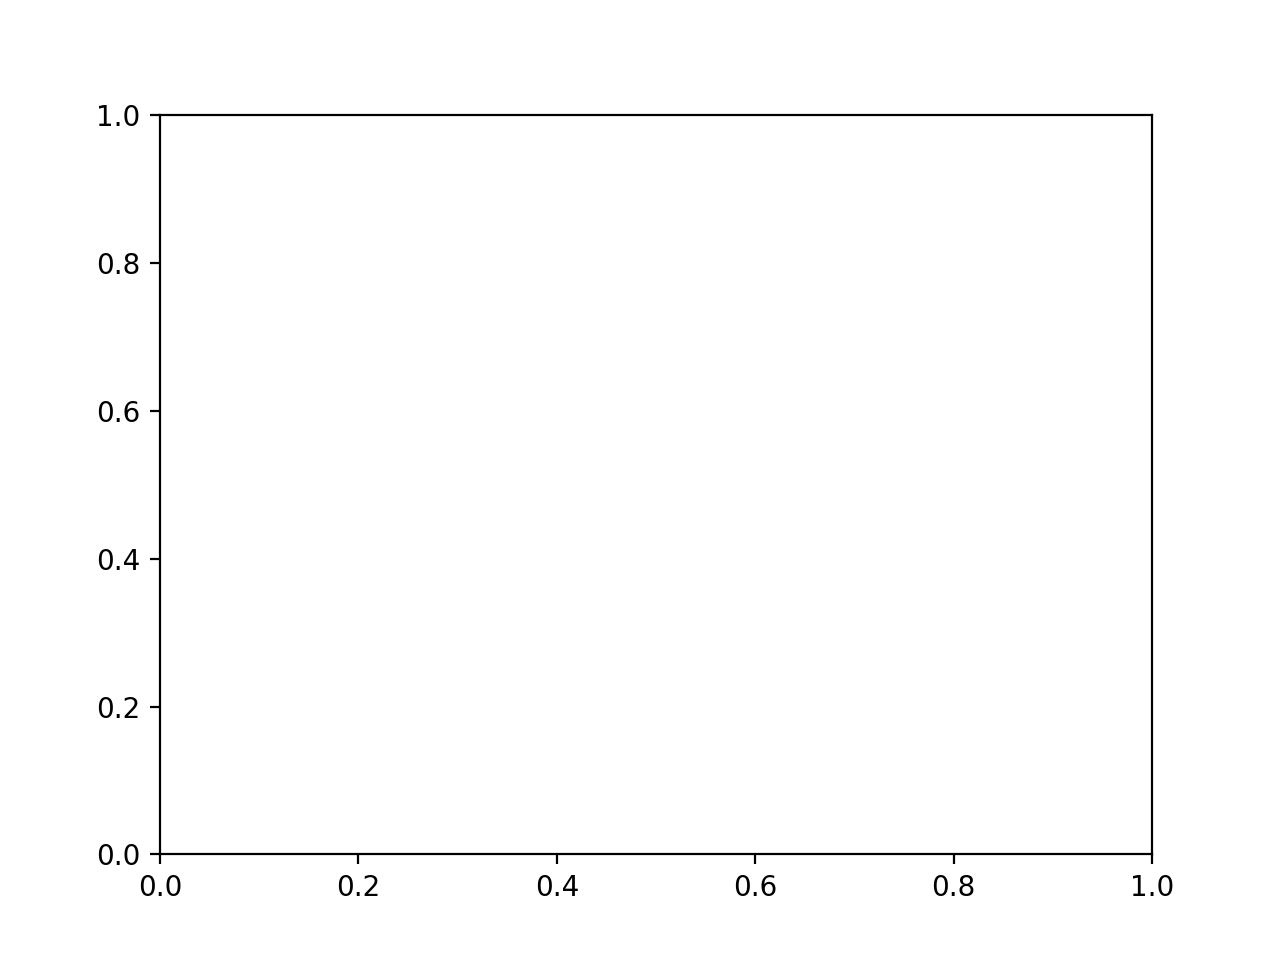

In [ ]:
%matplotlib notebook
visualize_knn_boundary(knnclassifier)